<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/main/machine_learning/mini_lessons/ap_stats_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Episode summary:
- Fitting a linear regression to understand the relationship between Ad spend and iPhone sales
- Connecting statistics to machine learning
- Describing how you can start learning machine learning

In [53]:
import warnings
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
from imageio import imread


class CFG:
    fig_x = 12
    fig_y = 8

warnings.filterwarnings('ignore')

# The Task
Apple is preparing to launch the new iPhone 14. They need help determining whether they should invest in running an Ad campaign for the new iPhone, and if so, how much they should expect to spend on the campaign to meet their sales goal. They have a dataset containing data on money spent on various Ad campaigns and the total number of units sold of previous iPhone models.

Our task is to use the historical sales data to help Apple: 
1. determine whether there is a linear relationship between Ad spend and iPhone sales, and
2. predict the number of iPhone units sold given an amount spent on advertising.


## Our approach
We'll use ideas from statistics and machine learning to solve this task. Specifically, we'll (1) fit a regression model to the data and (2) use the model to perform a hypothesis test and make prediction.

## Step 0: Load the data

In [54]:
# First we load the data.
data = pd.read_csv('https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/advertising_1.csv')
data

,ad_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


About the data:

* **ad_spend**: Amount of money spent on advertising (in millions).
* **sales**: Number of iPhone units sold (in millions) for a given Ad campaign.

The data contains 200 records. Each record (row) represents a given Ad campaign and the corresponding number of iPhone units sold. 

> For our task, ad_spend is the *explanatory* (or independent) variable and sales is the *response* (or dependent) variable.

## Step 1: Check conditions for (linear) regression
✅ **Quantitative Variables Condition**: Are the variables (i.e., $x$ and $y$) in quantitative form? Yes!

☑️ **Straight Enough Condition**: Is the data linear?

☑️ **Outlier Condition**: Are there any outlying points that may dramatically change a regression model and mislead us about the underlying relationship between the variables?

☑️ **Equal Variance Condition**: Is the variance of the residuals consistent? Are there any obvious patterns in the residuals plot?


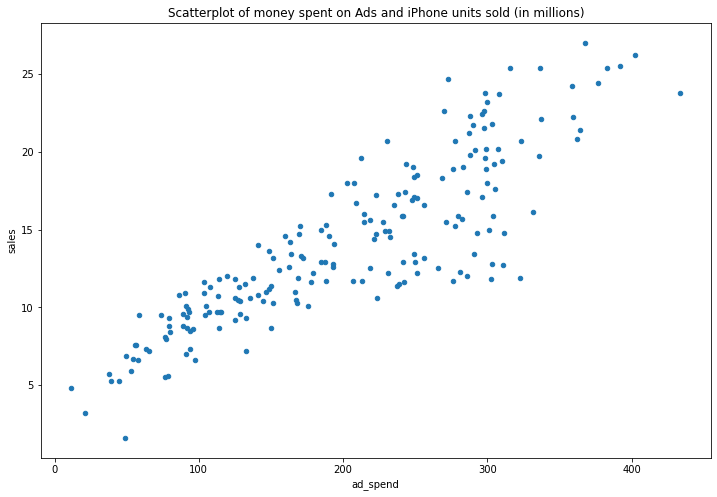

In [55]:
# Check if the data looks linear
data.plot.scatter(
    x='ad_spend', y='sales', title='Scatterplot of money spent on Ads and iPhone units sold (in millions)', 
    figsize=(CFG.fig_x, CFG.fig_y)
);

"Eyeballing the data in the plot, the relationship between Ad spend and sales looks fairly linear, so we can proceed with our analysis!"

✅ **Quantitative Variables Condition**: Are the variables (i.e., $x$ and $y$) in quantitative form? Yes!

✅ **Straight Enough Condition**: The data looks fairly linear.

✅ **Outlier Condition**: There are no obvious outliers (although there is a cluster of points between ad_spend of 250 and 340 that may impact the regression model slightly). 

☑️ **Equal Variance Condition**: Is the variance of the residuals consistent? Are there any obvious patterns in the residuals plot?


The last condition we need to meet is the Equal Variance Condition. Let's fit a regression model to the data and look at the residuals to see if the condition is met.



## Step 2: Fit a linear regression model to the data

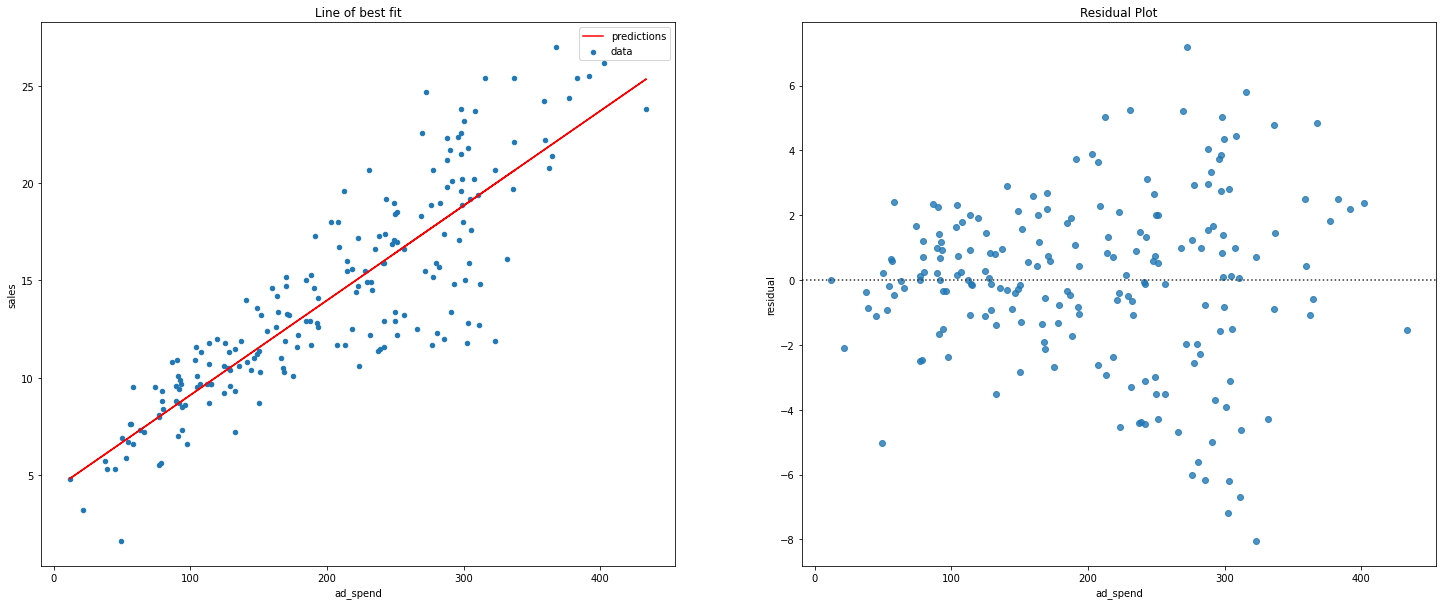

In [56]:
# Here we define and fit a linear regression model to the data.
model = smf.ols('sales ~ ad_spend', data=data).fit()

# Now we compute and save predictions and residuals. 
ypred = model.predict(data)
data['ypred'] = ypred

residuals = data['sales'] - ypred
data['residual'] = model.resid

# Now let's plot the line-of-best fit and the residuals.
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
# Plot the line-of-best fit.
data.plot.scatter(x='ad_spend', y='sales', ax=ax[0], label='data')
data.plot.line(x='ad_spend', y='ypred', ax=ax[0], label='predictions', color='red')
ax[0].set_title("Line of best fit")
ax[0].legend(loc='best')

# Plot the residuals.
p = sns.residplot(x=data['ad_spend'], y=data['sales'], ax=ax[1])
p.set_ylabel('residual')
p.set_title("Residual Plot");

"There are no concerning patterns in the residual plot."

✅ **Quantitative Variables Condition**: Are the variables (i.e., $x$ and $y$) in quantitative form? Yes!

✅ **Straight Enough Condition**: The data looks fairly linear.

✅ **Outlier Condition**: There are no obvious outliers (although there is a cluster of points between ad_spend of 250 and 340 that may impact the regression model slightly). 

✅ **Equal Variance Condition**: The residual plot shows no obvious pattern (the residuals for ad_spend between 250 and 340 are more spread out, but this was expected and we'll consider it 'good enough' for now).


With all the conditions met for linear regression, we are ready to analyze the relationship between ad spend and iPhone sales.


## Step 3: Interpret the fitted linear model

In [57]:
print(model.summary2())
print('Correlation coefficient (r):', np.sqrt(model.rsquared))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.752   
Dependent Variable: sales            AIC:                951.7645
Date:               2022-05-23 20:33 BIC:                958.3612
No. Observations:   200              Log-Likelihood:     -473.88 
Df Model:           1                F-statistic:        603.4   
Df Residuals:       198              Prob (F-statistic): 5.06e-62
R-squared:          0.753            Scale:              6.7598  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    4.2430     0.4385    9.6757   0.0000   3.3782   5.1078
ad_spend     0.0487     0.0020   24.5637   0.0000   0.0448   0.0526
-----------------------------------------------------------------
Omnibus:               6.851        Durbin-Watson:          1.967
Prob(Omnibus):   

Equation of the least squares regression line and interpretation:

> $\hat{\text{sales}} = 4.243 + 0.0487$(ad_spend)

* **y-intercept**: A y-intercept of 4.243 represents the predicted number of iPhone units sold (in millions) when Apple spends \$0 on advertising.
* **slope**: For every additional million dollars spent on advertising, the number of iPhone units sold is expected to increase by 48,760.


Correlation coefficient:
> $r ≈ 0.868$

A correlation coefficient around 0.86 indicates that there is a strong, positive, linear relationship between Ad spend and the number of iPhone units sold.

Coefficient of determination:
> $R^2 = 0.752$


Approximately 75.2% of the variability in iPhone sales can be explained by a linear relationship between the Ad spend and the number of iPhone units sold.

## Step 4: Determine whether Ad spend influences iPhone sales

The hypothesis:

$H_0: β_1=0$ -- no evidence that there is a linear relationship between Ad spend and iPhone sales
 
$Hₐ: β_1≠0$ -- there is evidence that there is a linear relationship between Ad spend and iPhone sales

In [58]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.752   
Dependent Variable: sales            AIC:                951.7645
Date:               2022-05-23 20:38 BIC:                958.3612
No. Observations:   200              Log-Likelihood:     -473.88 
Df Model:           1                F-statistic:        603.4   
Df Residuals:       198              Prob (F-statistic): 5.06e-62
R-squared:          0.753            Scale:              6.7598  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    4.2430     0.4385    9.6757   0.0000   3.3782   5.1078
ad_spend     0.0487     0.0020   24.5637   0.0000   0.0448   0.0526
-----------------------------------------------------------------
Omnibus:               6.851        Durbin-Watson:          1.967
Prob(Omnibus):   

The p-value associated with the hypothesis $H_0: β_1=0$ vs. $Hₐ: β_1≠0$ is reported to be 0.000, which is much smaller than any typical significance level. As such, we would reject the null hypothesis $H_0: β_1=0$ and conclude that iPhone sales are significantly influenced by Ad spend.

> Apple probably wants to know if Ad spend *positively* influences iPhone sales, so we would change $Hₐ: β_1≠0$ to $Hₐ: β_1>0$. To test this case, we can take the p-value for the two-sided t-test and divide it by two like so: $0.000 ÷ 2 = 0.000$. Similar to our previous test, we reject the null hypotheses $H_0: β_1=0$ and conclude that Ad spend has a significant positive influence on iPhone sales.

In [59]:
# 95% CI for B_1 (i.e, a right-tailed t-test)
t_multi = scipy.stats.t.ppf(q=1-0.05, df=model.df_resid)
ci_lo_b0 = model.params['Intercept'] - (t_multi * model.bse['Intercept'])
ci_hi_b0 = model.params['Intercept'] + (t_multi * model.bse['Intercept'])
ci_lo_b1 = model.params['ad_spend'] - (t_multi * model.bse['ad_spend'])
ci_hi_b1 = model.params['ad_spend'] + (t_multi * model.bse['ad_spend'])
print(np.array([ci_lo_b1, ci_lo_b1]) * 1_000_000)

[45412.27647928 45412.27647928]


We can be 95% confident that the mean number of iPhone units sold increases between 45.4k and 52k for every million dollars Apple spends on advertising. 
> It is up to Apple's management to decide whether or not this is a meaningful enough increase in sales to justify increasing Ad spend.

## Step 5: Predict the number of iPhones sold when the money spent on advertising is $450 million.

 > $\hat{\text{sales}} = 4.243 + 0.0487$(450) = 26.158

According to the linear model, spending $450 million on advertisements is predicted to result in 26.158 million iPhone units sold.

> **Bonus challenge**: What is the 95% confidence interval for the expected number of iPhones sold when Apple spends $450 million on advertising?

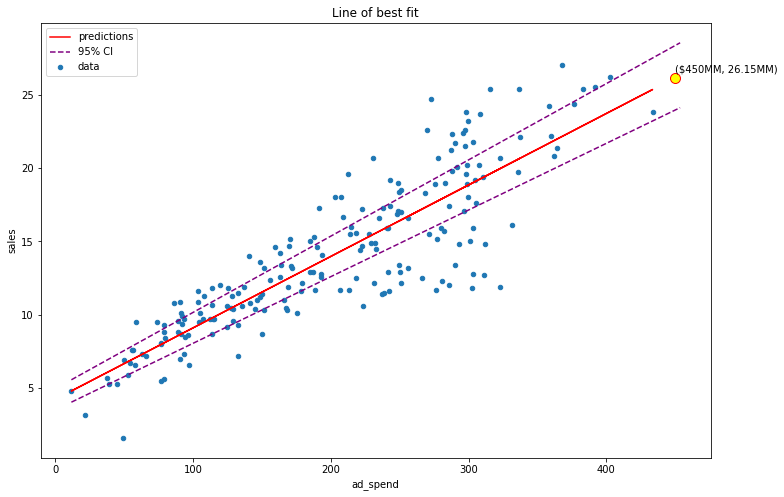

In [60]:
# plot the line-of-best fit, the prediction, and 95% CI
fig, ax = plt.subplots(figsize=(CFG.fig_x, CFG.fig_y))
# plot the data
data.plot.scatter(x='ad_spend', y='sales', ax=ax, label='data')
data.plot.line(x='ad_spend', y='ypred', ax=ax, label='predictions', color='red')

# make prediction
pred_x = 450
yhat = model.predict(exog=dict(ad_spend=[pred_x]))[0]
# plot prediction
ax.plot(
    pred_x, yhat, marker='o', markersize=10, markeredgecolor="red", 
    markerfacecolor='yellow',
)
ax.annotate(f"(${pred_x}MM, {round(yhat, 2)}MM)", (pred_x, yhat + .4))
# Add 95% CIs
x_vals = np.linspace(data.ad_spend.min(), data.ad_spend.max() + 20, 200)
ci_lo_vals = ci_lo_b0 + (x_vals * ci_lo_b1)
ci_hi_vals = ci_hi_b0 + (x_vals * ci_hi_b1)
ax.plot(x_vals, ci_lo_vals, linestyle='--', color='purple', label="95% CI")
ax.plot(x_vals, ci_hi_vals, linestyle='--', color='purple')
# Stylize plot
ax.set_title("Line of best fit")
ax.legend(loc='best');

# What's all the fuss about machine learning (ML)?
<br>
<img src='https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/images/ml_combines_cs_and_stats_meme.png'>

<br>

ML combines ideas from computer science, stats, and math. It's primary goal is to enable machines to learn to perform a task. Said another way, ML focuses on enabling computers to learn to make good predictions given input data. 

> ML is very much geared towards **maximizing predictive power** (i.e., emphasizes practical application) relative to stats or math, which focus more on explanatory power and theory.

## Strengths of ML
---
💪 Can handle non-linear, multi-variable, and lots of data.

💪 Can model complex and multi-domain data (e.g., text 📝, pictures 📸, videos 🎥, audio 🔊, combinations of these 🔀)!

💪 Can improve over time 📈.

💪 Can enhance human experience 🧑 + 🤖 = 🤗 (e.g., augment learning, creativity, skill, and productivity).



### Augmented learning and productivity -- ML assisted programming:
<br/>
<img src='https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/images/github_copilot.gif'>

<br/>

### Creativity -- ML generated images from human text descriptions:

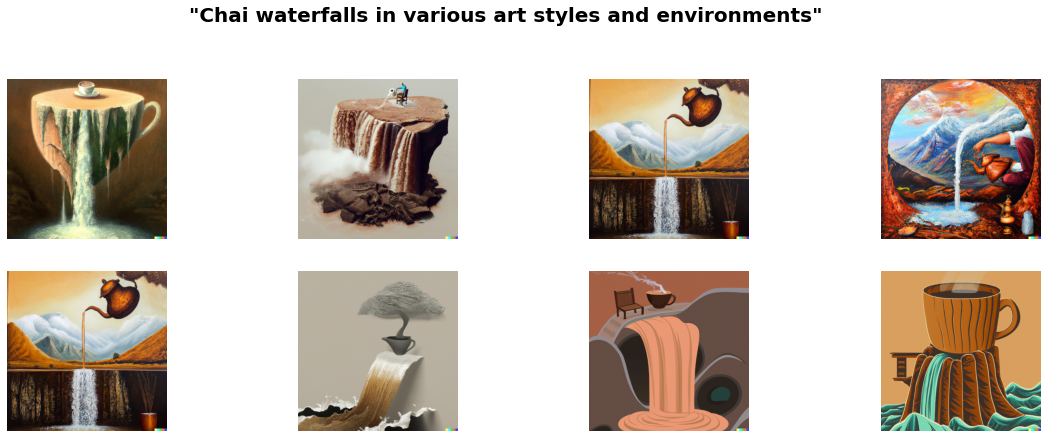

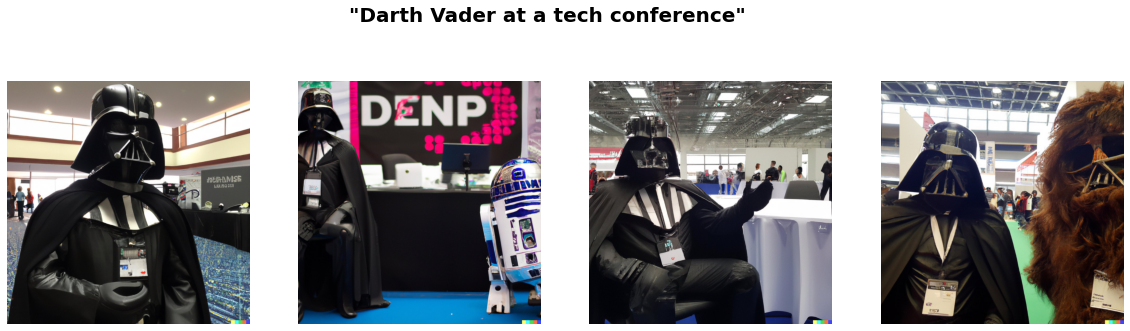

In [45]:
def display_images(imgs: list, ncols: int, title: str, figsize: tuple=(20, 10)):
    plt.figure(figsize=(20,10))
    columns = ncols
    for i, image in enumerate(imgs):
        plt.subplot(len(imgs) / columns + 1, columns, i + 1)
        img = imread(image)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f'"{title}"', fontsize=20, fontweight="bold")
    plt.show();

chai_imgs = [
    'https://pbs.twimg.com/media/FP8HE4RWYAgxIGN?format=jpg&name=medium',
    'https://pbs.twimg.com/media/FP8HE4uX0AIoecL?format=jpg&name=medium',
    'https://pbs.twimg.com/media/FP8HdkxXMAMBLLD?format=jpg&name=medium',
    'https://pbs.twimg.com/media/FP8HcHUX0AEglqi?format=jpg&name=medium',
    'https://pbs.twimg.com/media/FP8HdkxXMAMBLLD?format=jpg&name=medium',
    'https://pbs.twimg.com/media/FP8MDF-XEAAAXvN?format=jpg&name=medium',
    'https://pbs.twimg.com/media/FP8N1lEXEAI9_y5?format=jpg&name=medium',
    'https://pbs.twimg.com/media/FP8N1lJWQAUxkVE?format=jpg&name=medium',
]
starwars_imgs = {
    "Darth Vader at a tech conference": [
        'https://pbs.twimg.com/media/FR-B1PTXMAUhoLS?format=jpg&name=medium',
        'https://pbs.twimg.com/media/FR-B1PWXsAEUrj_?format=jpg&name=medium',
        'https://pbs.twimg.com/media/FR-CBWuWQAEI0ma?format=jpg&name=medium',
        'https://pbs.twimg.com/media/FR-B1PWXMAELJ4l?format=jpg&name=medium'
    ],
    "Darth Vader eating sushi in California": [
        'https://pbs.twimg.com/media/FR-xH5pXIAAtmhg?format=jpg&name=medium',
        'https://pbs.twimg.com/media/FR-xH5rX0AANBqB?format=jpg&name=medium'
    ],
    "Stormtroopers working in Silicon Valley": [
        "https://pbs.twimg.com/media/FR68-F2agAAmr4X?format=jpg&name=medium",
        "https://pbs.twimg.com/media/FR68FzmaMAIJ5_5?format=jpg&name=medium"
    ],
}

display_images(chai_imgs, 4, "Chai waterfalls in various art styles and environments")
display_images(starwars_imgs["Darth Vader at a tech conference"], 4, "Darth Vader at a tech conference")

### Safety and health -- ML for object recognition and disease detection:

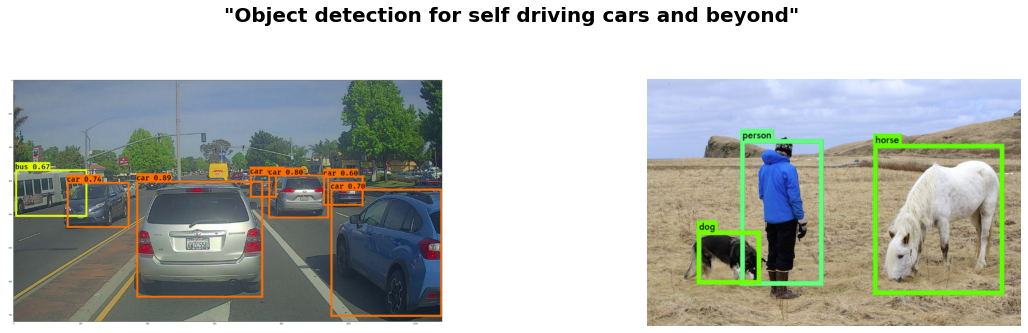

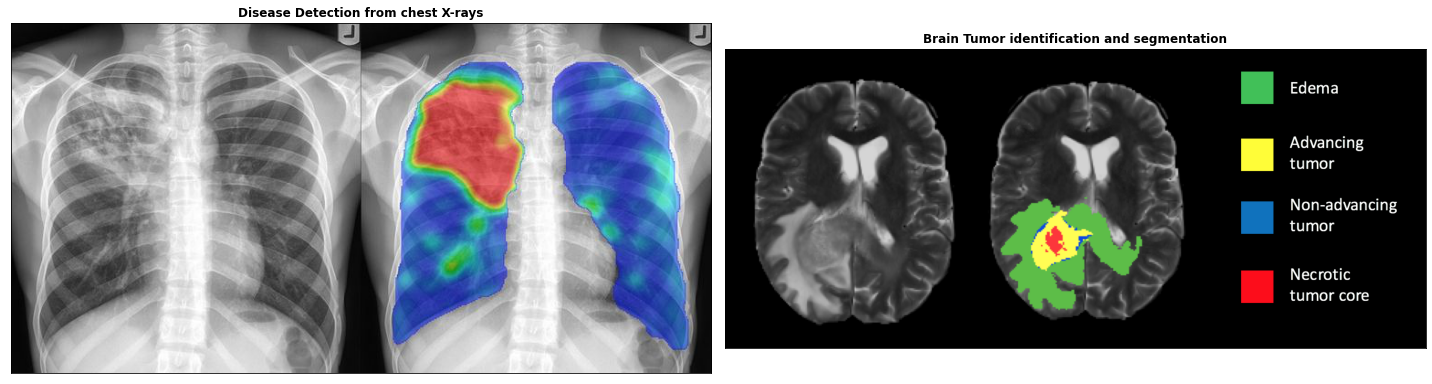

In [48]:
# Detection: Detecting disease and objects
obj_imgs = {
    "Object detection for self driving and beyond": [
        "https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/images/ml_object_detection_cars_yolo.png",
        "https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/images/yolov4_obj_detection_animals_person.png",
        
    ],
    "Disease Detection from chest X-rays": [
        "https://assets.diagnijmegen.nl/images/projects/cxr.jpg",
    ],
    "Brain Tumor identification and segmentation": [
        "https://raw.githubusercontent.com/naldeborgh7575/brain_segmentation/master/images/segmented_slice.png"
    ],
}

display_images(obj_imgs["Object detection for self driving and beyond"], 2, "Object detection for self driving cars and beyond")
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(imread(obj_imgs["Disease Detection from chest X-rays"][0]))
axs[0].set_title('Disease Detection from chest X-rays', fontweight='bold')
axs[0].set(xticks=[], yticks=[])
axs[1].imshow(imread(obj_imgs["Brain Tumor identification and segmentation"][0]))
axs[1].set_title('Brain Tumor identification and segmentation', fontweight='bold')
axs[1].set(xticks=[], yticks=[])
fig.tight_layout()
plt.show();

# How to get started learning and building ML
---


✅ Learn the foundations of statistics

✅ Pick a coding environment (e.g., Google Colab)

☑️ Choose a learning resource (e.g., a book, MOOC, university course, or personalized curriculum and mentor)

☑️ Start learning and building!

<br/>

> ### The best and most enjoyable way to learn ML is by doing interactive lessons, building projects that interest you, and having a mentor that supports you along the way.

<br/>

Breakout Mentors provides our ML students with highly personalized 1-on-1 mentorship, interactive lessons, and hands-on project support (from brainstorming to implementing and sharing). 

> Our program enables students to intuitively understand the foundations of ML, think like a data scientist, and build impressive real-world ML projects (from web apps to research publications), regardless of their background.


<br/>


We have a proven track record of success, with many of our students winning local and national awards for their ML projects, landing internships in industry and academia, and receiving admission to some of the world's top universities.

> Our students come from all backgrounds. Some have prior knowledge of advanced math (calculus and beyond), programming, and ML. But, most do not.

<br/>

If you're looking for an ML program that's engaging and fits around your busy schedule, look no further than Breakout Mentors! We offer flexible scheduling so you can learn on your time. In addition, we have a variety of learning options available, from summer deep dives to year-round learning. Our knowledgeable mentors are passionate about ML and will help you reach your goals. Contact us today to learn more!
> - Schedule a phone call with me: https://breakoutmentors.com/kai
- Read about our ML program: https://breakoutmentors.com/ml
- Send me an email: kai@breakoutmentors.com 

